In [1]:
import sys

# Change path to wherever you have repo locally
sys.path.append('/oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline')

from Plotting.src import *

/home/users/ymo/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# gene enrichment

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


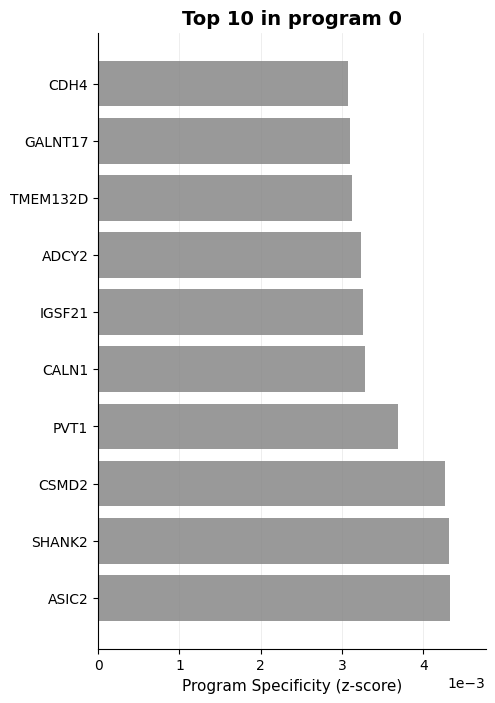

In [2]:
plot_top_gene_per_program('/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240701_cNMF/output/all/consensus_NMF/consensus_NMF.spectra.k_100.dt_0_2.consensus.txt')

# GO enrichment

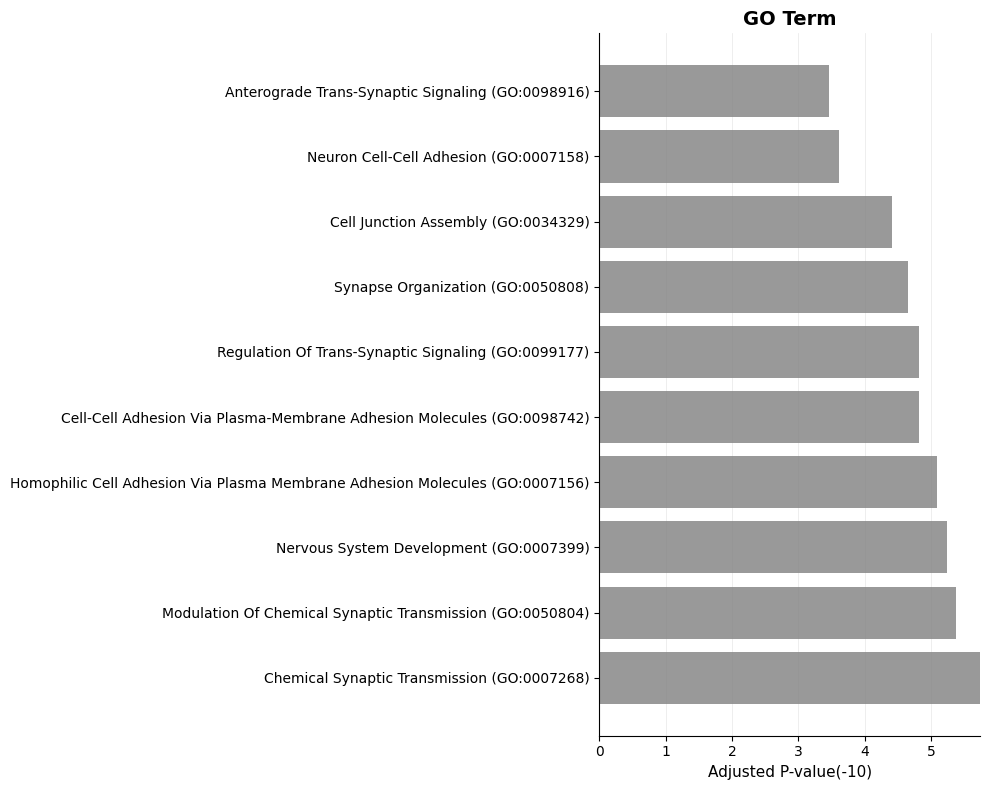

In [2]:
top_GO_per_program("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240807_cNMF_eval_pipeline_analysis/100/100_GO_term_enrichment.txt")


# motif enrichment

In [17]:
def plot_motif_per_program(path, num_term = 10,  program_num = 0, day = None, title = "Enhancer", p_value_name = "Adjusted P-value", folder_name = None, file_name = None):

    # read txt file
    df = pd.read_csv(path, sep='\t', index_col=0)

    # local to a program and isolate Term
    df_program = df.loc[df['program_name'] == program_num]

    if day is not None:
        df_program = df_program.loc[df_program['sample'] == day]

    # rename index
    df_program.index = df_program['motif']

    # sort by the smallest p value
    df_sort = df_program[p_value_name].nsmallest(num_term)

    # -log10 tranform
    df_sort_log = -np.log10(df_sort)

    # Create the plot
    fig, ax = plt.subplots(figsize=(5, 8))

    # Create horizontal bar plot
    bars = ax.barh(range(len(df_sort_log)), df_sort_log.values, color='#808080', alpha=0.8)

    # Customize the plot
    ax.set_yticks(range(len(df_sort_log)))
    ax.set_yticklabels(df_sort_log.index, fontsize=10)
    ax.set_xlabel('Adjusted P-value(-10)', fontsize=11)

    # Format x-axis to match your reference
    ax.set_xlim(0, max(df_sort_log.values))
    ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

    # Add grid
    ax.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    # Add title
    if day is not None:
        ax.set_title(f"{title} at {day} and program {program_num}", fontsize=14, fontweight='bold')
    else:
         ax.set_title(f"{title} at program {program_num}", fontsize=14, fontweight='bold')



    # Adjust layout
    plt.tight_layout()    

    if folder_name and file_name:
        fig.savefig(f"{folder_name}/{file_name}.png")

# plot volcano plots by date
def plot_all_days_motif(path, num_term = 10,  program_num = 0, title = "Enhancer", p_value_name = "Adjusted P-value", folder_name = None, file_name = None):
    for samp in ['D0', 'D1', 'D2', 'D3']:
        plot_motif_per_program(path,num_term=num_term, program_num=program_num,day = samp, p_value_name ="adj_pval",  title = title,folder_name=folder_name,file_name=file_name)


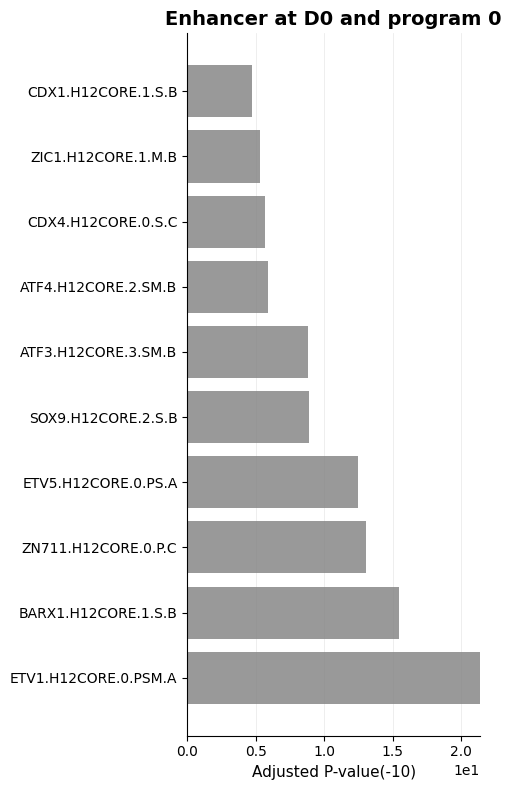

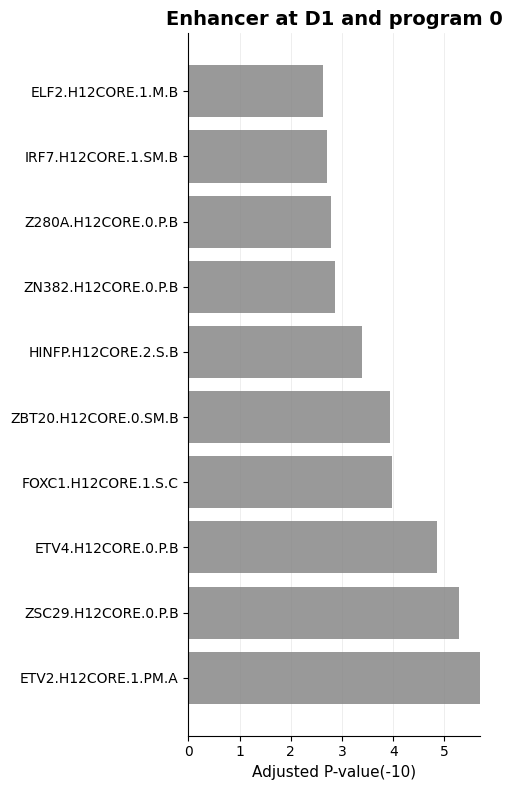

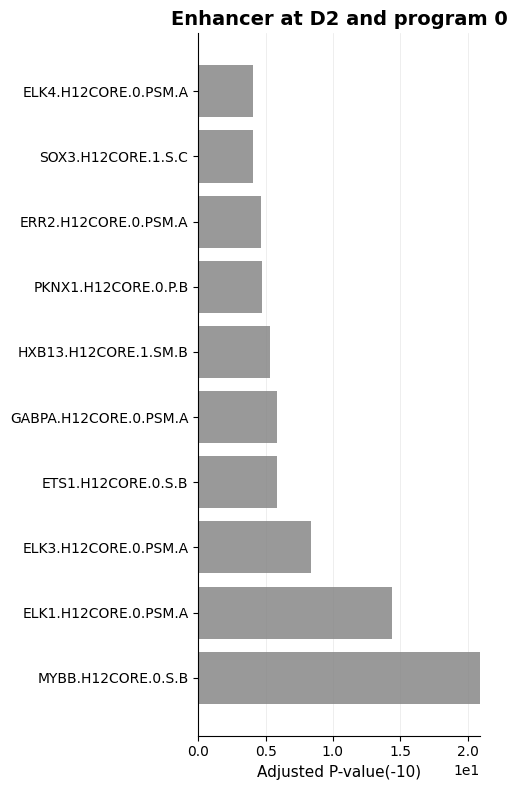

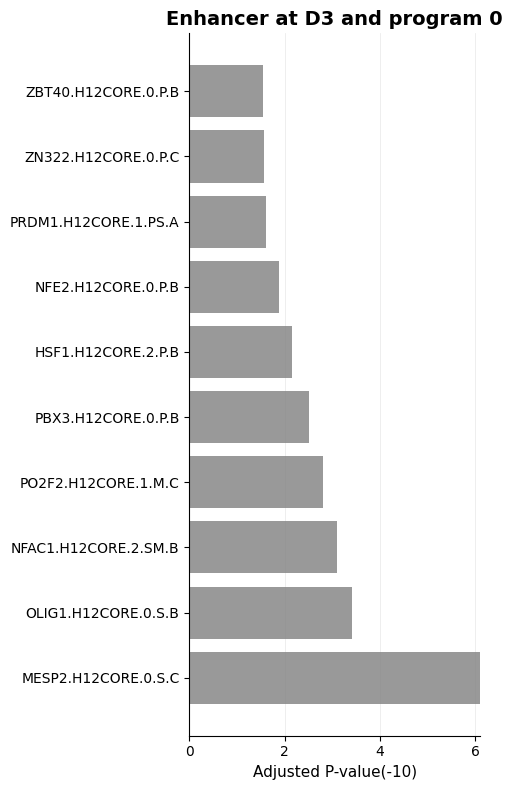

In [13]:
plot_all_days_motif("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/241119_scE2G_motif_enrichment/cNMF_100_motif_enrichment_enhancer.txt", 
        title = "Enhancer")

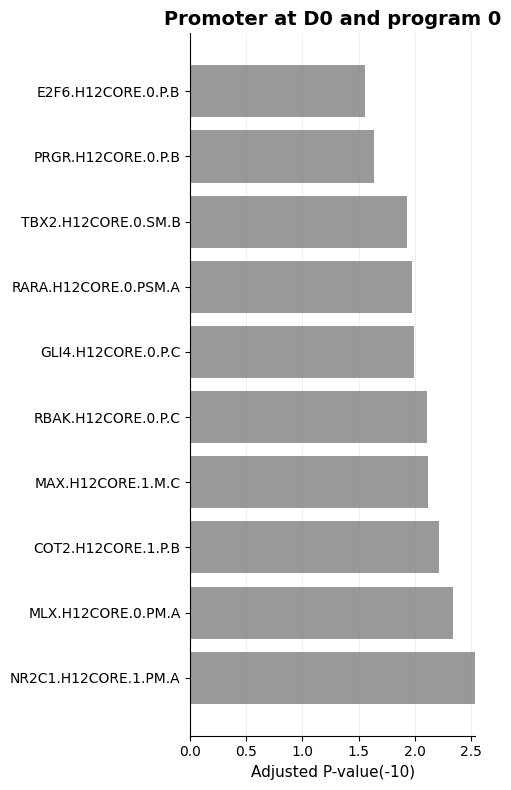

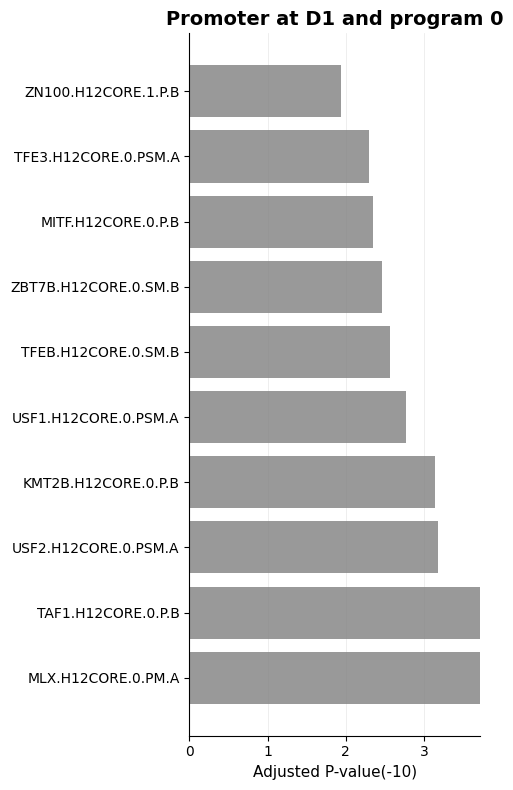

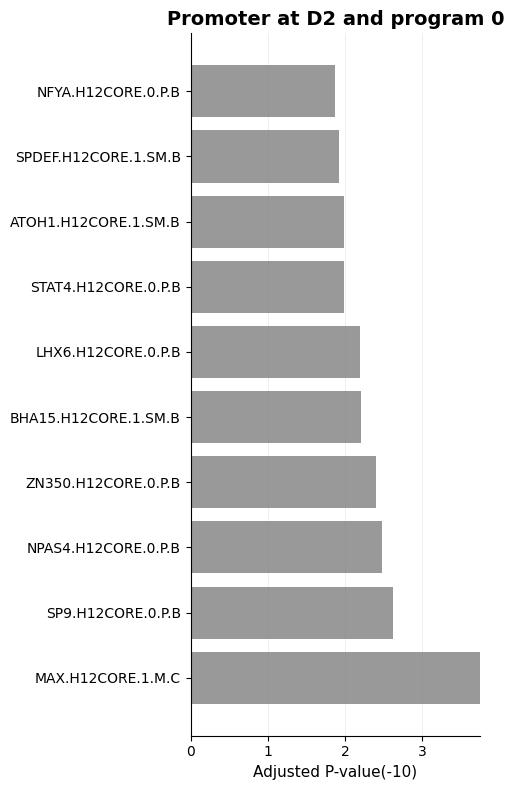

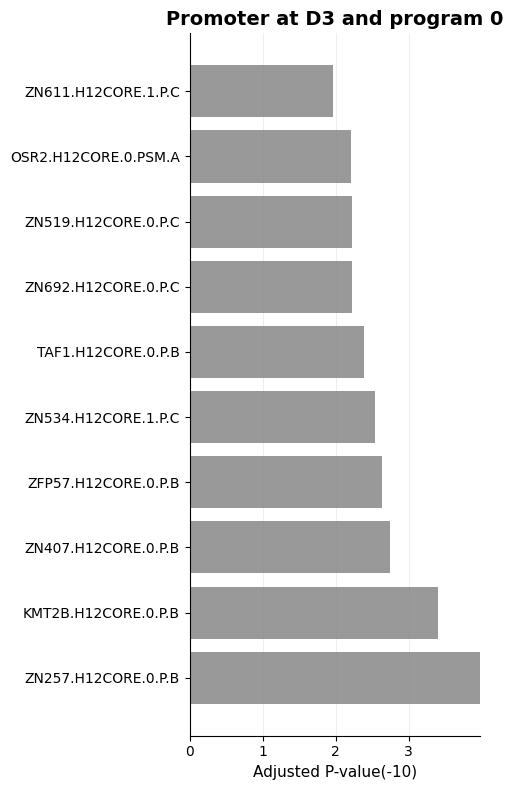

In [14]:
plot_all_days_motif("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/241119_scE2G_motif_enrichment/cNMF_100_motif_enrichment_promoter.txt", 
        title = "Promoter")

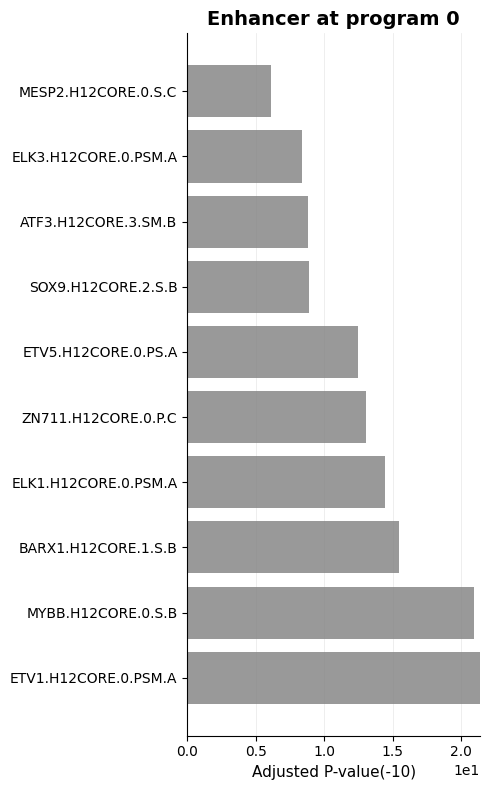

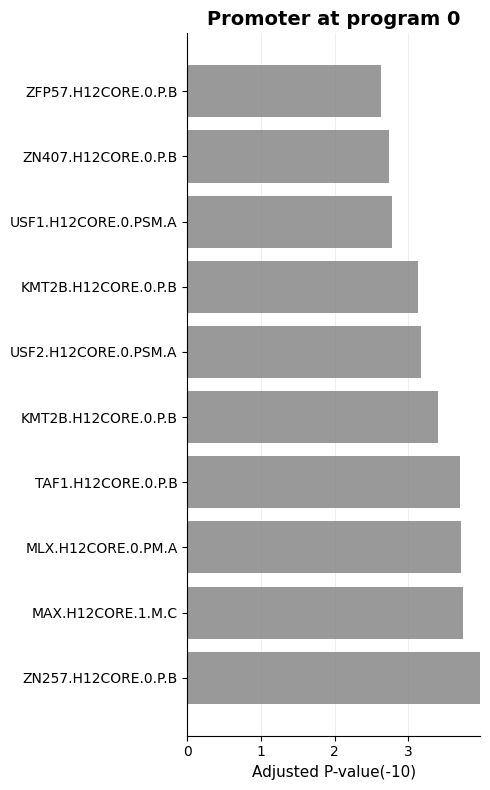

In [18]:
plot_motif_per_program("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/241119_scE2G_motif_enrichment/cNMF_100_motif_enrichment_enhancer.txt", 
p_value_name ="adj_pval",
title = "Enhancer")

plot_motif_per_program("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/241119_scE2G_motif_enrichment/cNMF_100_motif_enrichment_promoter.txt", 
p_value_name ="adj_pval",
title = "Promoter")

# umap

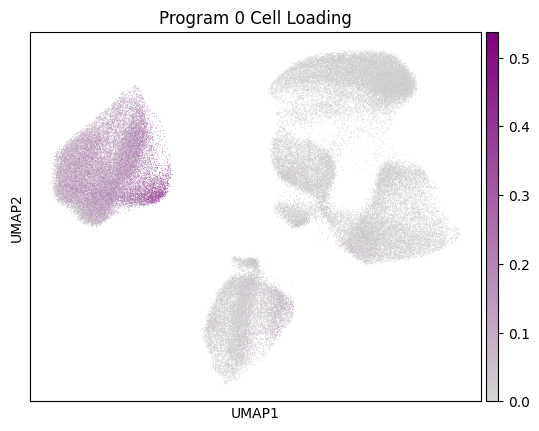

In [4]:
plot_umap_per_program("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240816_clustering_annotation_package/cNMF_100_0.2_preprocessed.h5mu",
"/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240701_cNMF/output/all/consensus_NMF/consensus_NMF.usages.k_100.dt_0_2.consensus.txt")

# perturbationa analysis

## bar plot

In [7]:
folder = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample_D0_perturbation_association.txt"

In [8]:
df = pd.read_csv(folder, sep = "\t")

In [9]:
df

,target_name,program_name,ref_mean,test_mean,log2FC,stat,pval,adj_pval
0,ACAA1,7,0.002467,0.002366,-0.059867,1161780.5,0.880950,0.989642
1,ACAA1,1,0.003482,0.003373,-0.045842,1131134.0,0.171636,0.779015
2,ACAA1,8,0.004010,0.003810,-0.073751,1139572.5,0.329061,0.875316
3,ACAA1,0,0.089275,0.086644,-0.043155,1135681.5,0.335523,0.877905
4,ACAA1,2,0.086493,0.086146,-0.005812,1157219.5,0.789727,0.976144
...,...,...,...,...,...,...,...,...
29795,safe-targeting,97,0.000926,0.001052,0.183569,3601862.0,0.731990,0.967613
29796,safe-targeting,96,0.001625,0.001304,-0.317404,3601519.0,0.728877,0.967112
29797,safe-targeting,92,0.001288,0.001102,-0.225165,3635388.0,0.755693,0.971434
29798,safe-targeting,99,0.000763,0.000554,-0.462199,3619286.0,0.995766,0.999361


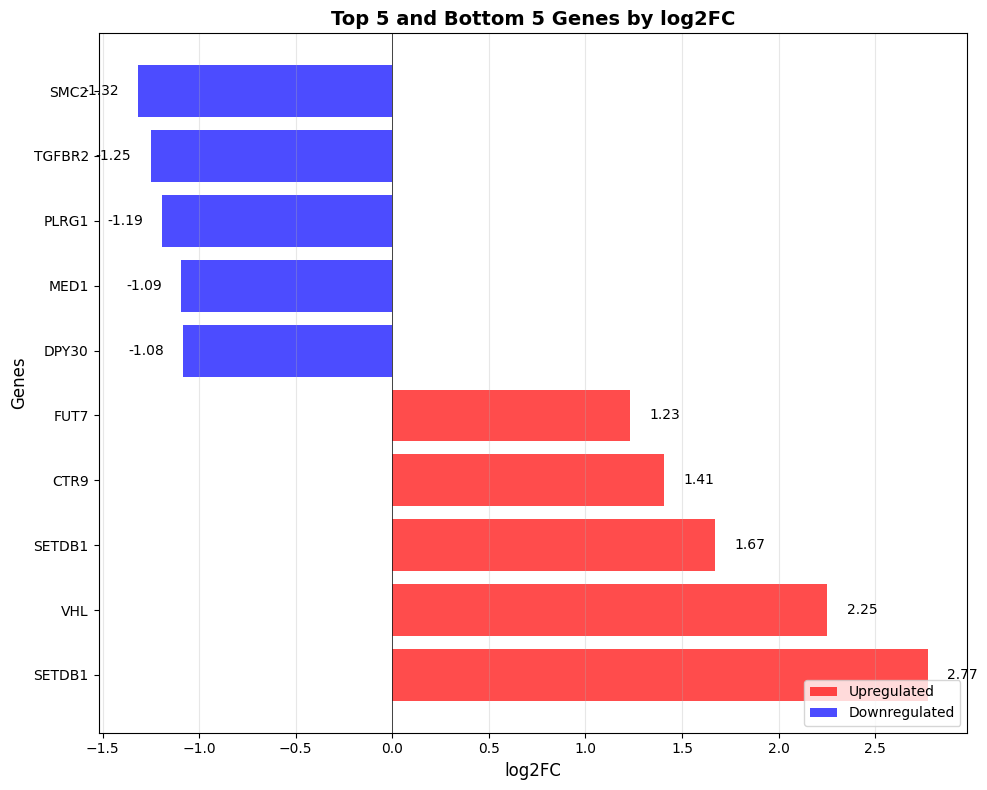

In [12]:
plot_top_bottom_genes(df, gene_col='target_name', log2fc_col='log2FC')

In [11]:
def plot_top_bottom_genes(df, gene_col='gene', log2fc_col='log2FC', save_path=None):

    
    # Sort by log2FC
    df_sorted = df.sort_values(by=log2fc_col, ascending=False)
    
    # Get top 5 and bottom 5
    top_5 = df_sorted.head(5)
    bottom_5 = df_sorted.tail(5)
    
    # Combine and add category
    top_5 = top_5.copy()
    top_5['category'] = 'Top 5 (Upregulated)'
    
    bottom_5 = bottom_5.copy()
    bottom_5['category'] = 'Bottom 5 (Downregulated)'
    
    # Combine data
    plot_data = pd.concat([top_5, bottom_5])
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    
    # Create horizontal bar plot
    colors = ['red' if x > 0 else 'blue' for x in plot_data[log2fc_col]]
    
    bars = plt.barh(range(len(plot_data)), plot_data[log2fc_col], color=colors, alpha=0.7)
    
    # Customize the plot
    plt.yticks(range(len(plot_data)), plot_data[gene_col])
    plt.xlabel('log2FC', fontsize=12)
    plt.ylabel('Genes', fontsize=12)
    plt.title('Top 5 and Bottom 5 Genes by log2FC', fontsize=14, fontweight='bold')
    
    # Add a vertical line at x=0
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, plot_data[log2fc_col])):
        plt.text(value + (0.1 if value > 0 else -0.1), i, f'{value:.2f}', 
                va='center', ha='left' if value > 0 else 'right', fontsize=10)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', alpha=0.7, label='Upregulated'),
                      Patch(facecolor='blue', alpha=0.7, label='Downregulated')]
    plt.legend(handles=legend_elements, loc='lower right')
    
    # Adjust layout
    plt.tight_layout()
    plt.grid(axis='x', alpha=0.3)
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

## volcano plot

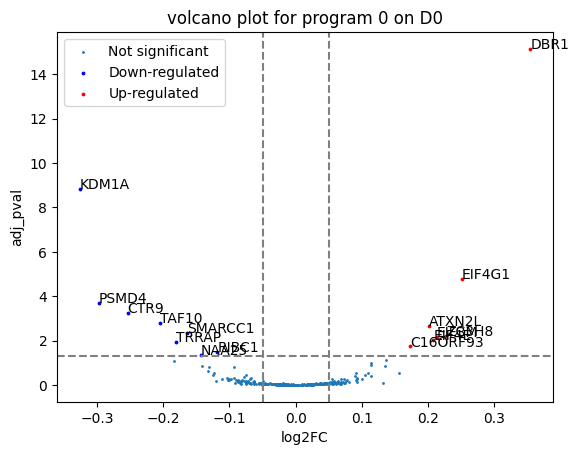

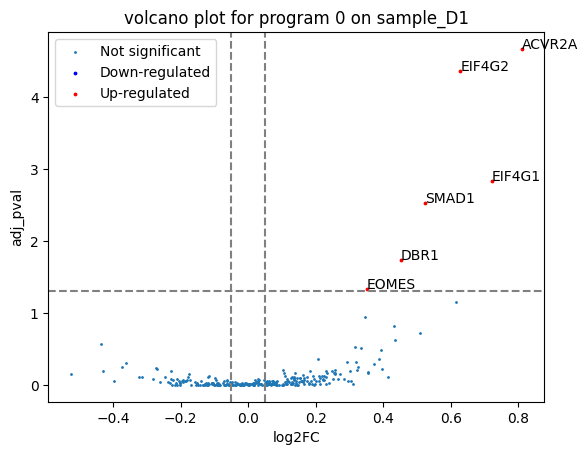

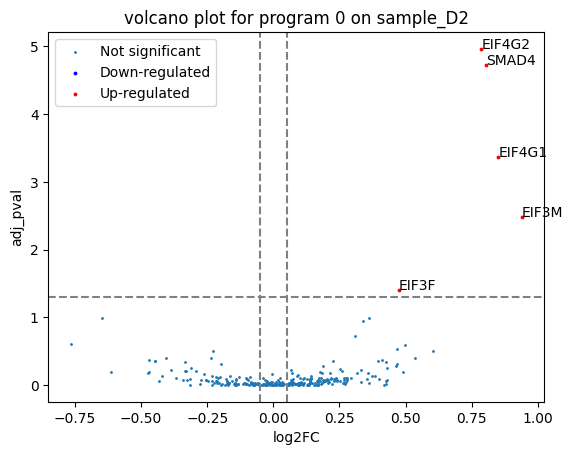

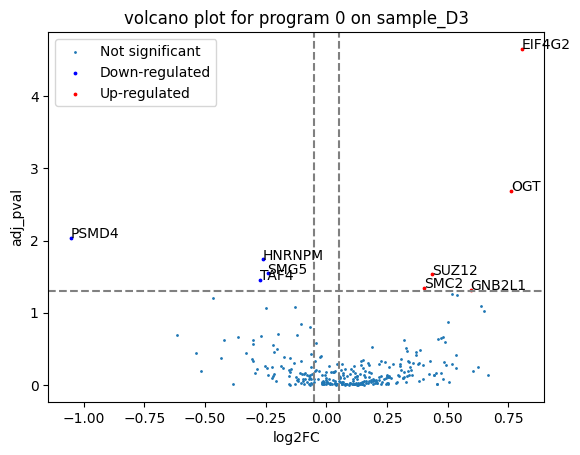

In [2]:
plot_all_days_valcano("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100",
                      "cNMF_100_gene_sample")